<a href="https://colab.research.google.com/github/Oyinoye/Covid-19-Analytics-Dashboard--Demographics-Correlation/blob/master/Covid_19_US_UK_SA_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Analysis

In [ ]:
# Install Plotly
# !pip install Plotly==4.12

# Install Dash
# !pip install dash
# !pip install dash-html-components
# !pip install dash-core-components
# !pip install dash-table

#Install Pycountry
# !pip install sqlalchemy
# !pip install seaborn

In [5]:
import pandas as pd
import numpy
import seaborn as sns
import sqlite3
from sqlite3 import Error
import matplotlib.pyplot as plt


In [12]:
# Importing and checking US data 
input_file_name = '/content/covid_test_data.csv'
df_csv = pd.read_csv(input_file_name)
print(df_csv.head(5))

  First Name Last Name Gender  ... Test Result Hospitalized Recovered
0      Cammy   Albares      F  ...    Negative           No       Yes
1       Yuki   Whobrey      M  ...    Positive          Yes       Yes
2       Tina   Clapham      F  ...    Negative           No       Yes
3       Lura  Manzella      M  ...    Positive          Yes       Yes
4      Lenna  Paprocki      F  ...    Positive           No        No

[5 rows x 18 columns]


In [13]:
table_head = list(df_csv.columns.values)
print(table_head)


['First Name', 'Last Name', 'Gender', 'Date of Birth', 'Ethnic Origin', 'Occupation', 'Address Line 1', 'Address Line 2', 'Town', 'Country', 'Post/Zip Code', 'Telephone No', 'Symptoms', 'Vaccinated', 'Test Date', 'Test Result', 'Hospitalized', 'Recovered']


In [14]:
# Create database connection

def create_connection(db_file):
    conn = None
    try:
        conn = sqlite3.connect(db_file)
    except Error as e:
        print(e)

    return conn

create_connection('data_covid.db')

In [15]:
# create_connection to ('data_covid.db') and create table
                
conn = create_connection('data_covid.db')

def create_table(tblName):
    # Create table and append csv file
    df_csv.to_sql('User_tbl', conn, if_exists='replace', index=False)
    # db.session.add(sql_table)
    # db.session.commit()

create_table('User_tbl')

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:2615: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  method=method,


In [17]:
# Create cursor and get dataframe from sql file.

cur = conn.cursor()

conn.commit()

df = pd.read_sql_query('SELECT * FROM User_tbl', conn)

df.describe()

,First Name,Last Name,Gender,Date of Birth,Ethnic Origin,Occupation,Address Line 1,Address Line 2,Town,Country,Post/Zip Code,Telephone No,Symptoms,Vaccinated,Test Date,Test Result,Hospitalized,Recovered
count,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87
unique,85,85,2,87,5,9,86,79,56,6,84,86,2,2,51,2,2,2
top,Alisha,Bowling,F,11/18/1991,Asian,Service & Support Workers,8 Nova Scotia,Central Buchan Ward,Aberdeenshire,United States of America,CF40 2JJ,01816-462521,Yes,Yes,7/3/2021,Positive,Yes,Yes
freq,2,2,47,1,27,13,2,2,6,30,2,2,50,47,5,48,48,49


DATA EXAMINING AND CLEANING

In [18]:
#Types of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   First Name      87 non-null     object
 1   Last Name       87 non-null     object
 2   Gender          87 non-null     object
 3   Date of Birth   87 non-null     object
 4   Ethnic Origin   87 non-null     object
 5   Occupation      87 non-null     object
 6   Address Line 1  87 non-null     object
 7   Address Line 2  87 non-null     object
 8   Town            87 non-null     object
 9   Country         87 non-null     object
 10  Post/Zip Code   87 non-null     object
 11  Telephone No    87 non-null     object
 12  Symptoms        87 non-null     object
 13  Vaccinated      87 non-null     object
 14  Test Date       87 non-null     object
 15  Test Result     87 non-null     object
 16  Hospitalized    87 non-null     object
 17  Recovered       87 non-null     object
dtypes: object(18

In [19]:
# Glimpse of the data in the sql file - top
df.head()

,First Name,Last Name,Gender,Date of Birth,Ethnic Origin,Occupation,Address Line 1,Address Line 2,Town,Country,Post/Zip Code,Telephone No,Symptoms,Vaccinated,Test Date,Test Result,Hospitalized,Recovered
0,Cammy,Albares,F,12/28/1993,Asian,Managers,"56 E Morehead St, Laredo",Webb,Texas,United States of America,78045,956-537-6195,No,No,7/5/2021,Negative,No,Yes
1,Yuki,Whobrey,M,10/31/1934,Hispanic,Craft Workers,1190 Mark Street,Pietersburg,Limpopo,South Africa,0713,083 993 4035,Yes,Yes,7/3/2021,Positive,Yes,Yes
2,Tina,Clapham,F,11/4/1934,Hispanic,Machine Operators,5662 William Moult St,Aylesbury,Buckinghamshire,England - United Kingdom,EH52 6NF,01428-343825,Yes,Yes,6/29/2021,Negative,No,Yes
3,Lura,Manzella,M,11/28/2002,Asian,Armed Forces,929 Augustine St,Staple Hill Ward,South Gloucestershire,England - United Kingdom,BS16 4LL,01907-538509,No,Yes,5/19/2021,Positive,Yes,Yes
4,Lenna,Paprocki,F,12/8/1995,Caucasian,Machine Operators,639 Main St,Anchorage,Arkansas,United States of America,99501,907-385-4412,No,Yes,5/28/2021,Positive,No,No


In [20]:
# Glimpse of the data in the sql file - tail
df.tail()

,First Name,Last Name,Gender,Date of Birth,Ethnic Origin,Occupation,Address Line 1,Address Line 2,Town,Country,Post/Zip Code,Telephone No,Symptoms,Vaccinated,Test Date,Test Result,Hospitalized,Recovered
82,Ezekiel,Chui,M,4/2/1955,Hispanic,Machine Operators,"2 Cedar Ave #84, Easton",Talbot,Maryland,United States of America,21601,410-669-1642,Yes,No,6/13/2021,Negative,No,Yes
83,Sol,Cowser,M,2/23/1961,Asian,Machine Operators,6448 Tillard St,Conisbrough and Denaby Ward,South Yorkshire,England - United Kingdom,RG22 5HA,01262-808399,No,Yes,6/13/2021,Negative,Yes,No
84,Maybelle,Consolazio,F,7/31/1965,Hispanic,Service & Support Workers,5410 Lawton St,Treorchy Community,Rhondda Cynon Taff,England - United Kingdom,SW3 4ND,01345-400452,Yes,No,5/9/2021,Negative,No,Yes
85,Ammie,Corrio,F,3/25/2003,Asian,Machine Operators,"74874 Atlantic Ave, Columbus",Franklin,Ohio,United States of America,43215,614-801-9788,No,No,5/5/2021,Negative,Yes,Yes
86,Arlean,Calaf,M,9/25/1964,Asian,Clerical Workers,82 Waterhouse Lane,Llantrisant Community,Rhondda Cynon Taff,Wales - United Kingdom,CF72 8LB,01448-395723,No,No,5/27/2021,Negative,No,Yes


In [21]:
# Checking for any missing values
df.isnull().sum()

First Name        0
Last Name         0
Gender            0
Date of Birth     0
Ethnic Origin     0
Occupation        0
Address Line 1    0
Address Line 2    0
Town              0
Country           0
Post/Zip Code     0
Telephone No      0
Symptoms          0
Vaccinated        0
Test Date         0
Test Result       0
Hospitalized      0
Recovered         0
dtype: int64

CREATION OF PIVOT TABLE IN SQL FOR ANALYSIS

In [22]:
# Pivot table creation for Data Analysis

df_analysis = pd.read_sql_query('''SELECT [Ethnic Origin],
    SUM(CASE WHEN [Test Result] = 'Positive' THEN 1 END) as Positive_Cases,
    SUM(CASE WHEN [Test Result] = 'Negative' THEN 1 END) as Negative_Cases,
    SUM(CASE WHEN [Vaccinated] = 'Yes' THEN 1 END) as Vaccinated,
    SUM(CASE WHEN [Hospitalized] = 'Yes' THEN 1 END) as Hospitalized,
    SUM(CASE WHEN [Gender] = 'M' THEN 1 END) as Males,
    SUM(CASE WHEN [Gender] = 'F' THEN 1 END) as Females,
    SUM(CASE WHEN [Symptoms] = 'Yes' THEN 1 END) as Symptoms,
    SUM(CASE WHEN [Recovered] = 'Yes' THEN 1 END) as Recovered,
    SUM(CASE WHEN [Recovered] = 'No' THEN 1 END) as Deaths 
  FROM
    User_tbl GROUP BY [Ethnic Origin]''', conn)

df_analysis.head()

,Ethnic Origin,Positive_Cases,Negative_Cases,Vaccinated,Hospitalized,Males,Females,Symptoms,Recovered,Deaths
0,Asian,19,8,14,18,15,12,14,16,11
1,Black African,5,9,8,9,4,10,10,9,5
2,Caucasian,9,11,12,11,6,14,9,8,12
3,Hispanic,8,8,8,6,8,8,11,11,5
4,Native American,7,3,5,4,7,3,6,5,5


DATA VISUALIZATION AND ANALYSIS

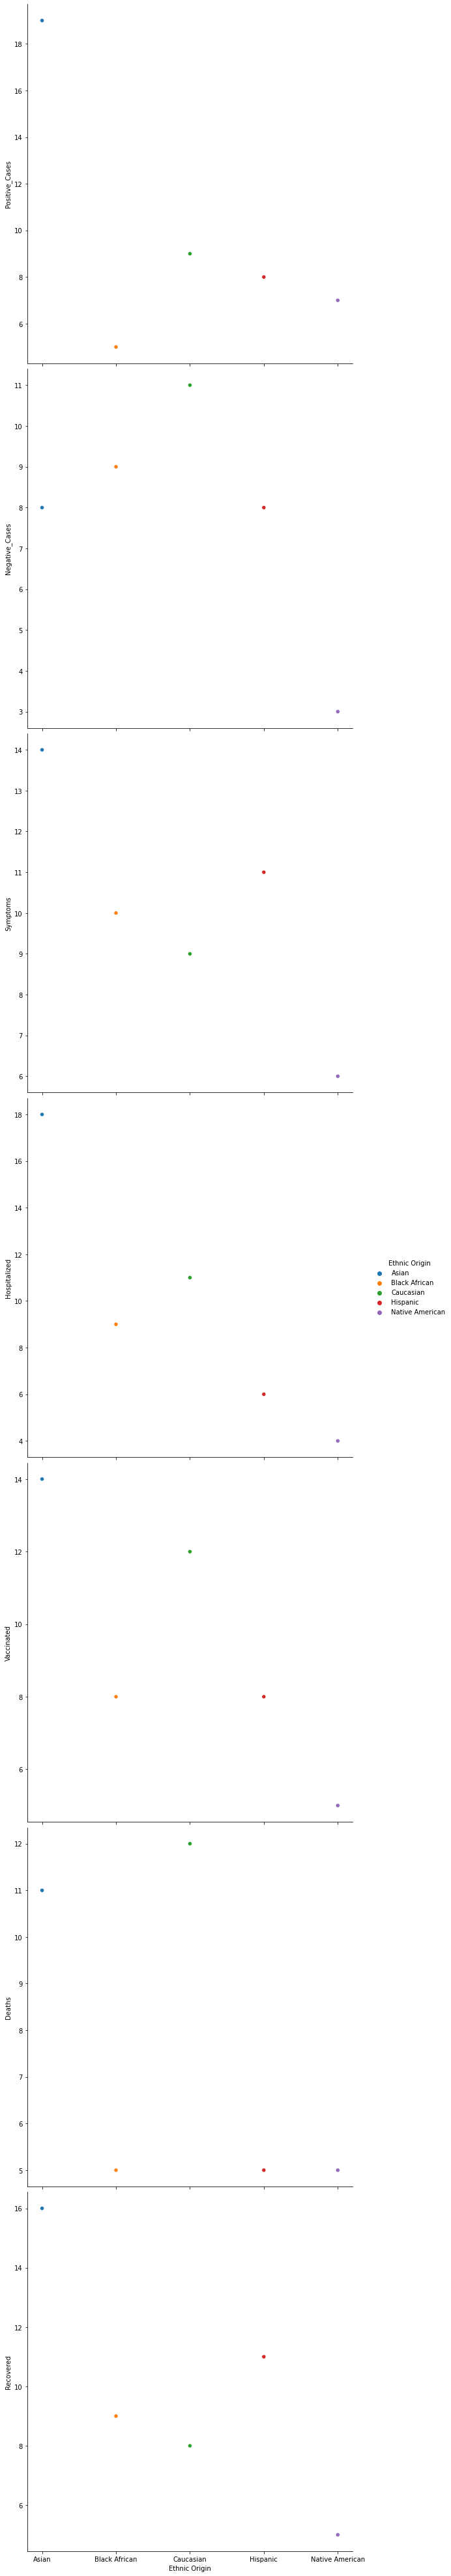

In [48]:
# Multi-plot 
%matplotlib inline
sns.pairplot(df_analysis, x_vars=['Ethnic Origin'],
                  y_vars=['Positive_Cases', 'Negative_Cases', 'Symptoms', 'Hospitalized', 'Vaccinated', 'Deaths', 'Recovered'], hue = "Ethnic Origin", height = 8)
# sns.scatterplot(df_analysis, kind='scatter')
plt.show()

In [ ]:
data = df_analysis[['Hospitalized', 'Symptoms', 'Vaccinated', 'Recovered', 'Ethnic Origin', 'Males', 'Females']]
plt.figure()

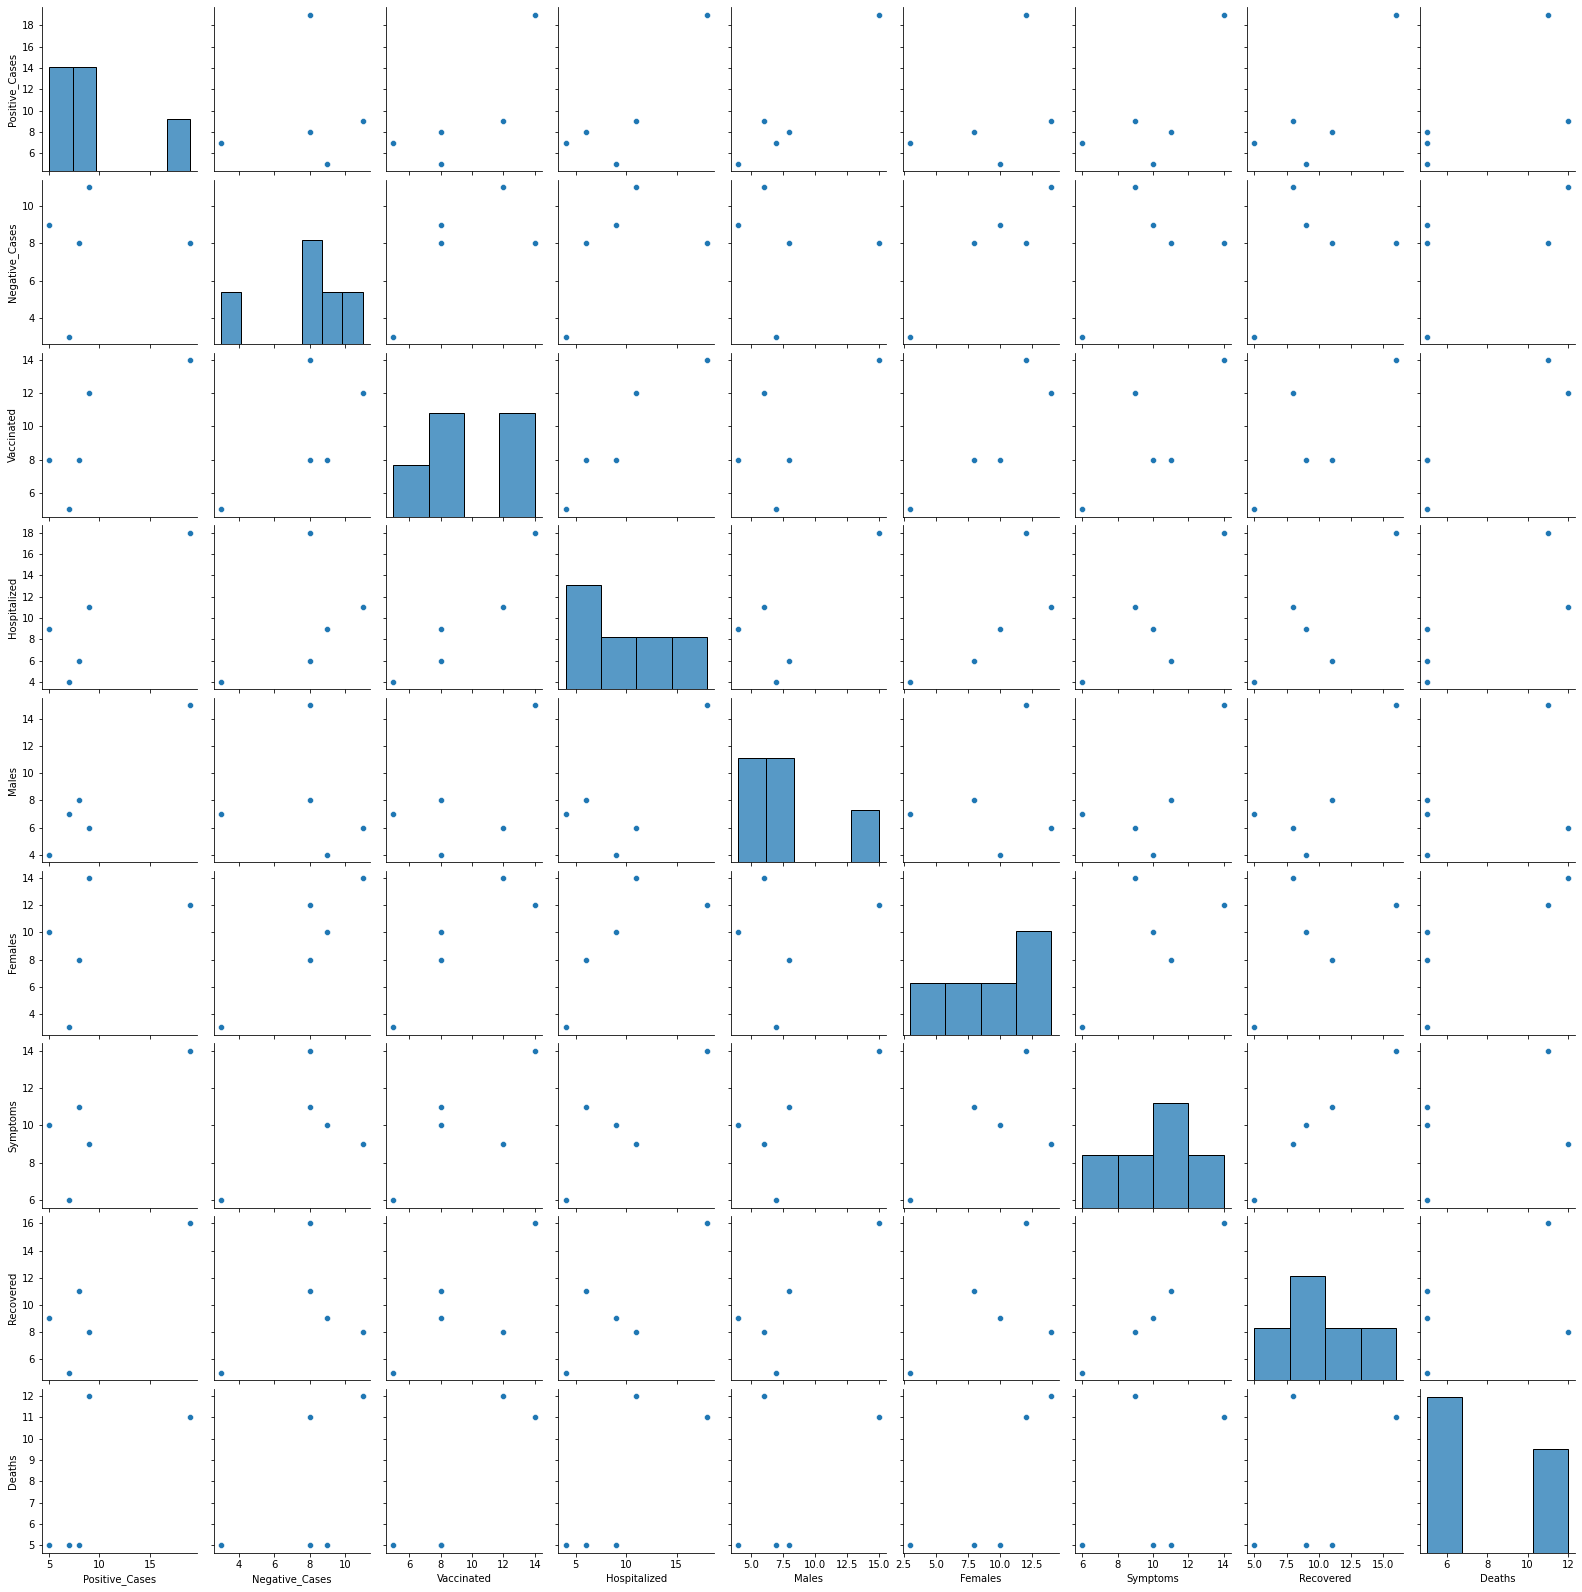

In [45]:
import seaborn as sns
sns.pairplot(df_analysis)

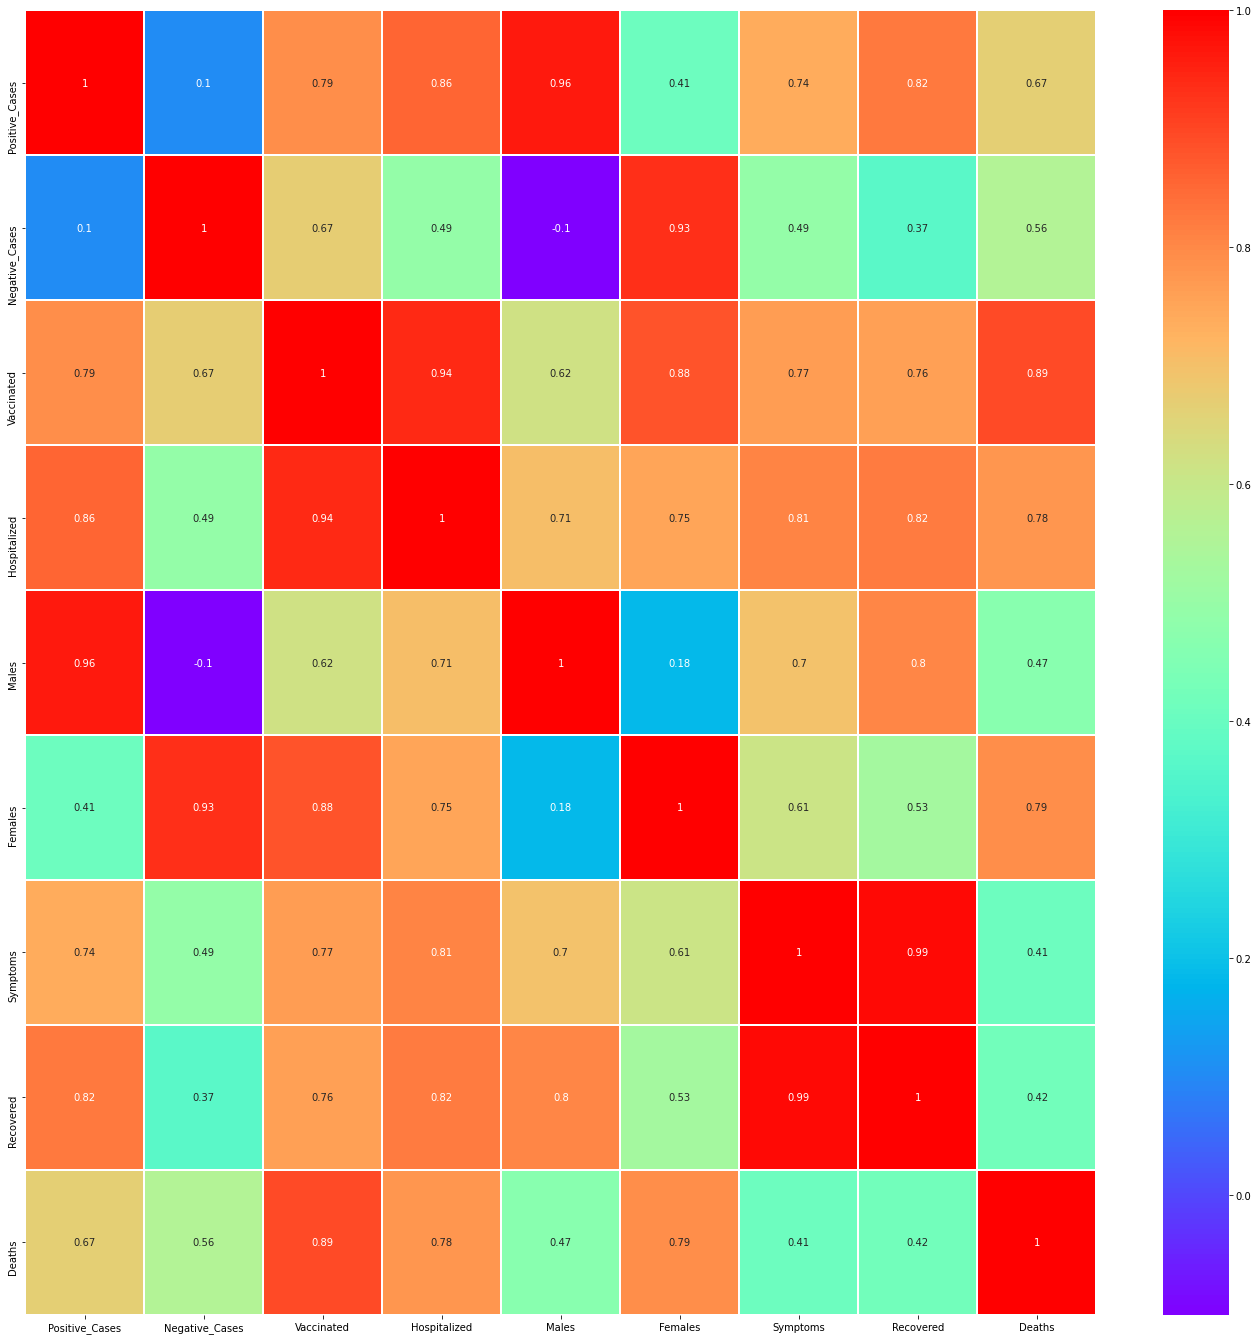

In [53]:
# Finding the correlation between events.

plt.figure(figsize=(24,24))
sns.heatmap(df_analysis.corr(),cmap="rainbow",annot=True,annot_kws={"size": 10},linewidths=1)

Examination of Critical Factors from Correlation with Respect to Ethnic Grouping

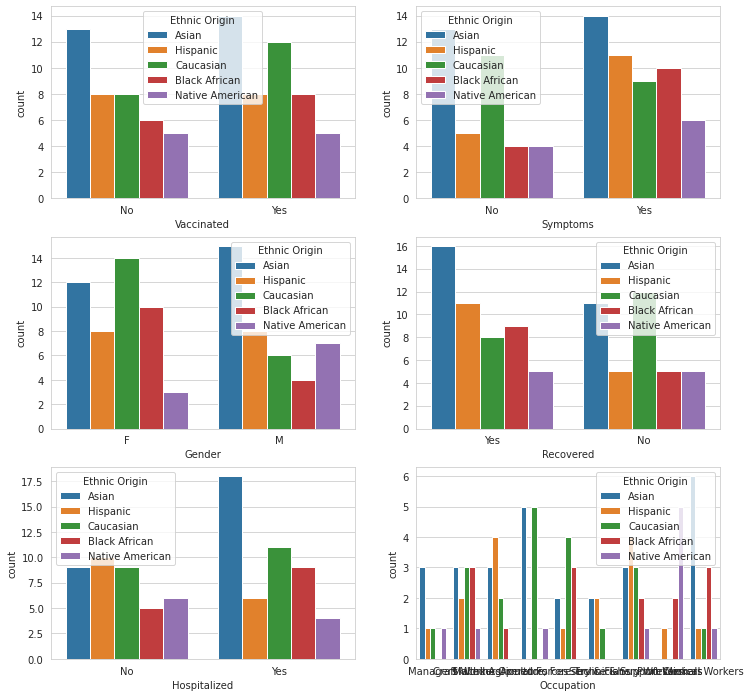

In [65]:
sns.set_style('whitegrid')

f,axes = plt.subplots(3,2, figsize=(12,12))

sns.countplot(x='Vaccinated', hue='Ethnic Origin', data=df, ax=axes[0,0])
sns.countplot(x='Symptoms', hue='Ethnic Origin', data=df, ax=axes[0,1])
sns.countplot(x='Gender', hue='Ethnic Origin', data=df, ax=axes[1,0])
sns.countplot(x='Recovered', hue='Ethnic Origin', data=df, ax=axes[1,1])
sns.countplot(x='Hospitalized', hue='Ethnic Origin', data=df, ax=axes[2,0])
sns.countplot(x='Occupation', hue='Ethnic Origin', data=df, ax=axes[2,1])

Machine Learning Modelling

In [67]:
# imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

Data pre-processing for ML

In [68]:
# Function to perform One Hot Encoding
def encode_onehot(data, column):
    data = data.copy()
    dumdata = pd.get_dummies(data[column], prefix=column)
    data = pd.concat([data, dumdata], axis=1)
    data = data.drop(column, axis=1)
    return data

In [93]:
# Function that processes inputs and returns X_train, X_test, y_train, and y_test values.
def processed_inputs(data):
    data = data.copy()

#     Remove the ID column
    data = data.drop('Address Line 1', axis=1)
    data = data.drop('Address Line 2', axis=1)
    data = data.drop('Post/Zip Code', axis=1)
    data = data.drop('Telephone No', axis=1)
    data = data.drop('Test Date', axis=1)
    data = data.drop('First Name', axis=1)
    data = data.drop('Last Name', axis=1)
    data = data.drop('Date of Birth', axis=1)
    
#     Binary encoding for gender
    data['Gender'] = data['Gender'].replace({'F': 0, 'M': 1})

    data['Symptoms'] = data['Symptoms'].replace({'No': 0, 'Yes': 1})
    data['Hospitalized'] = data['Hospitalized'].replace({'No': 0, 'Yes': 1})
    data['Vaccinated'] = data['Vaccinated'].replace({'No': 0, 'Yes': 1})
    data['Recovered'] = data['Recovered'].replace({'No': 0, 'Yes': 1})

    data['Test Result'] = data['Test Result'].replace({'Negative': 0, 'Positive': 1})
    
#     One-hot encoding
    for column in ['Ethnic Origin', 'Town', 'Country', 'Occupation']:
        data = encode_onehot(data, column=column)
        
    #Splitting df into X and y
    
    y = data['Test Result']
    X = data.drop('Test Result', axis=1)
    
#     Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, shuffle=True, random_state=1)
    
#     Scaling X using standard scaler
    scaler = StandardScaler()
    scaler.fit(X_train)
    
    X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)
    
    return X_train, X_test, y_train, y_test

In [94]:
# Spltting the data 
X_train, X_test, y_train, y_test = processed_inputs(df)


In [95]:
# View X_train 
X_train

,Gender,Symptoms,Vaccinated,Hospitalized,Recovered,Ethnic Origin_Asian,Ethnic Origin_Black African,Ethnic Origin_Caucasian,Ethnic Origin_Hispanic,Ethnic Origin_Native American,Town_Aberdeenshire,Town_Arkansas,Town_Belfast,Town_Buckinghamshire,Town_Caerphilly,Town_California,Town_Ceredigion,Town_City of Edinburgh,Town_Colorado,Town_Delaware,Town_Denbighshire,Town_Derbyshire,Town_East Sussex,Town_Eastern Cape,Town_Florida,Town_Gauteng,Town_Glasgow City,Town_Gloucestershire,Town_Greater London,Town_Greater Manchester,Town_Hampshire,Town_Idaho,Town_Kent,Town_KwaZulu-Natal,Town_Limpopo,Town_Louisiana,Town_Maryland,Town_Masachussets,Town_Merthyr Tydfil,Town_Michigan,...,Town_Minnesota,Town_New Jersey,Town_New York,Town_Newport,Town_North Eart Lincolnshire,Town_Northern Cape,Town_Ohio,Town_Rhode Island,Town_Rhondda Cynon Taff,Town_South Carolina,Town_South Gloucestershire,Town_South Yorkshire,Town_Staffordshire,Town_Stirling,Town_Surrey,Town_Tenessee,Town_Texas,Town_Tyne & Wear,Town_Vale of Glamorgan,Town_West Midlands,Town_West Sussex,Town_Western Cape,Town_Western Isles,Town_Wisconsin,"Town_Yorkshire, South",Country_England - United Kingdom,Country_Northern Ireland - United Kingdom,Country_Scotland - United Kingdom,Country_South Africa,Country_United States of America,Country_Wales - United Kingdom,Occupation_Armed Forces,Occupation_Clerical Workers,Occupation_Craft Workers,Occupation_Machine Operators,Occupation_Managers,Occupation_Professionals,Occupation_Service & Support Workers,"Occupation_Skilled Agriculture, Forestry & Fishery Workers",Occupation_Technicians
34,1.047270,-1.149534,0.954864,-1.114172,-1.149534,-0.666667,-0.451335,-0.547723,-0.475831,2.878492,-0.219971,-0.219971,0.0,0.0,-0.178174,-0.219971,-0.125,-0.125,-0.125,-0.178174,-0.125,-0.125,-0.125,-0.125,0.0,-0.219971,-0.125,0.0,4.546061,0.0,-0.125,0.0,-0.219971,-0.125,-0.125,-0.178174,0.0,-0.125,-0.125,-0.125,...,0.0,-0.125,-0.219971,-0.125,-0.125,0.0,-0.178174,-0.125,-0.178174,0.0,-0.125,-0.125,0.0,-0.125,-0.125,-0.125,-0.125,-0.125,-0.125,-0.178174,-0.125,-0.125,-0.125,-0.125,-0.125,1.351328,0.0,-0.318896,-0.347404,-0.765092,-0.288675,-0.426401,-0.400892,-0.288675,-0.347404,-0.318896,2.878492,-0.400892,-0.400892,-0.219971
32,1.047270,0.869918,-1.047270,0.897527,-1.149534,1.500000,-0.451335,-0.547723,-0.475831,-0.347404,-0.219971,-0.219971,0.0,0.0,-0.178174,-0.219971,-0.125,-0.125,-0.125,-0.178174,-0.125,-0.125,-0.125,-0.125,0.0,-0.219971,-0.125,0.0,-0.219971,0.0,-0.125,0.0,-0.219971,-0.125,-0.125,-0.178174,0.0,-0.125,-0.125,-0.125,...,0.0,-0.125,-0.219971,-0.125,-0.125,0.0,-0.178174,-0.125,5.612486,0.0,-0.125,-0.125,0.0,-0.125,-0.125,-0.125,-0.125,-0.125,-0.125,-0.178174,-0.125,-0.125,-0.125,-0.125,-0.125,-0.740013,0.0,-0.318896,-0.347404,-0.765092,3.464102,-0.426401,-0.400892,-0.288675,-0.347404,-0.318896,-0.347404,2.494438,-0.400892,-0.219971
31,1.047270,-1.149534,-1.047270,-1.114172,0.869918,-0.666667,-0.451335,-0.547723,2.101587,-0.347404,-0.219971,-0.219971,0.0,0.0,-0.178174,-0.219971,-0.125,-0.125,-0.125,-0.178174,-0.125,-0.125,-0.125,-0.125,0.0,-0.219971,-0.125,0.0,-0.219971,0.0,-0.125,0.0,-0.219971,-0.125,-0.125,-0.178174,0.0,-0.125,-0.125,-0.125,...,0.0,-0.125,-0.219971,-0.125,-0.125,0.0,-0.178174,-0.125,-0.178174,0.0,-0.125,-0.125,0.0,8.000,-0.125,-0.125,-0.125,-0.125,-0.125,-0.178174,-0.125,-0.125,-0.125,-0.125,-0.125,1.351328,0.0,-0.318896,-0.347404,-0.765092,-0.288675,-0.426401,-0.400892,-0.288675,-0.347404,-0.318896,2.878492,-0.400892,-0.400892,-0.219971
43,1.047270,-1.149534,-1.047270,-1.114172,0.869918,-0.666667,-0.451335,1.825742,-0.475831,-0.347404,-0.219971,-0.219971,0.0,0.0,-0.178174,-0.219971,-0.125,-0.125,-0.125,-0.178174,-0.125,-0.125,-0.125,-0.125,0.0,-0.219971,-0.125,0.0,-0.219971,0.0,-0.125,0.0,-0.219971,-0.125,-0.125,-0.178174,0.0,-0.125,-0.125,-0.125,...,0.0,-0.125,-0.219971,-0.125,8.000,0.0,-0.178174,-0.125,-0.178174,0.0,-0.125,-0.125,0.0,-0.125,-0.125,-0.125,-0.125,-0.125,-0.125,-0.178174,-0.125,-0.125,-0.125,-0.125,-0.125,1.351328,0.0

In [97]:
# View Y_train 
y_train

34    1
32    1
31    0
43    1
62    1
     ..
75    1
9     0
72    1
12    1
37    0
Name: Test Result, Length: 65, dtype: int64

Different Models for Training the Data

KNN Nearest Neighbour Classifier

In [98]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [99]:
knn.score(X_test, y_test)

0.5

In [100]:
#Prediction
y_pred_knn = knn.predict(X_test)
y_pred_knn

array([1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0])

Logistic Regression

In [101]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [102]:
lr.score(X_test, y_test)

0.6363636363636364

In [103]:
#Prediction
y_pred_lr = lr.predict(X_test)
y_pred_lr

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0])

Decision Tree

In [104]:
# Decision tree model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [105]:
dt.score(X_test, y_test)

0.4090909090909091

In [106]:
#Prediction
y_pred_dt = dt.predict(X_test)
y_pred_dt

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0])

Naive Bayes Classification

In [107]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [108]:
nb.score(X_test, y_test)

0.5454545454545454

In [109]:
# NB Predication 
y_pred_nb = nb.predict(X_test)
y_pred_nb

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0])

Unsuppervised Learning (Random Forest)

In [110]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [112]:
rf.score(X_test, y_test)

0.45454545454545453

In [113]:
# Prediction 

y_pred_rf = rf.predict(X_test)
y_pred_rf

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0])

Evaluation of Analysis

Further evaluations function

In [114]:
def evaluation(ypredict, estimator):
#     cross validation at 12 folds
    acc = cross_val_score(estimator = estimator, X=X_train, y=y_train, cv=12)
    print("Validation at 12 folds:", acc)
    
    print(classification_report(y_test, ypredict))
    print(confusion_matrix(y_test, ypredict))

KNN Model Evaluation

In [115]:
evaluation(y_pred_knn, knn)

Validation at 12 folds: [0.83333333 0.66666667 0.83333333 0.33333333 0.33333333 0.2
 0.4        0.2        0.8        0.6        0.6        0.8       ]
              precision    recall  f1-score   support

           0       0.45      0.50      0.48        10
           1       0.55      0.50      0.52        12

    accuracy                           0.50        22
   macro avg       0.50      0.50      0.50        22
weighted avg       0.50      0.50      0.50        22

[[5 5]
 [6 6]]


Logistics Regression Evaluation

In [116]:
evaluation(y_pred_lr, lr)

Validation at 12 folds: [0.16666667 0.66666667 0.33333333 0.83333333 0.66666667 0.4
 0.4        0.4        0.8        0.8        0.4        0.8       ]
              precision    recall  f1-score   support

           0       0.62      0.50      0.56        10
           1       0.64      0.75      0.69        12

    accuracy                           0.64        22
   macro avg       0.63      0.62      0.62        22
weighted avg       0.63      0.64      0.63        22

[[5 5]
 [3 9]]


Decision Tree Evaluation

In [117]:
evaluation(y_pred_dt, dt)

Validation at 12 folds: [0.33333333 0.5        0.5        0.66666667 0.66666667 0.2
 0.4        0.8        0.6        0.4        0.2        0.6       ]
              precision    recall  f1-score   support

           0       0.36      0.40      0.38        10
           1       0.45      0.42      0.43        12

    accuracy                           0.41        22
   macro avg       0.41      0.41      0.41        22
weighted avg       0.41      0.41      0.41        22

[[4 6]
 [7 5]]


Naive Bayes Model Evaluation

In [118]:
evaluation(y_pred_nb, nb)

Validation at 12 folds: [0.5        0.66666667 0.5        0.83333333 0.5        0.4
 0.4        0.2        0.8        0.8        0.4        0.8       ]
              precision    recall  f1-score   support

           0       0.50      0.90      0.64        10
           1       0.75      0.25      0.38        12

    accuracy                           0.55        22
   macro avg       0.62      0.57      0.51        22
weighted avg       0.64      0.55      0.50        22

[[9 1]
 [9 3]]


Random Forest Model Evaluation

In [119]:
evaluation(y_pred_rf, rf)

Validation at 12 folds: [0.33333333 0.83333333 0.5        0.5        0.66666667 0.4
 0.6        0.4        1.         0.8        0.4        0.6       ]
              precision    recall  f1-score   support

           0       0.38      0.30      0.33        10
           1       0.50      0.58      0.54        12

    accuracy                           0.45        22
   macro avg       0.44      0.44      0.44        22
weighted avg       0.44      0.45      0.45        22

[[3 7]
 [5 7]]
